# Decision Tree Classifier

__I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. I implement Decision Tree Classification with Python and Scikit-Learn.__

# **1. Introduction to Decision Tree algorithm** <a class="anchor" id="1"></a>


__A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.__


__A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.__


__We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-__

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


# **2. Classification and Regression Trees (CART)** <a class="anchor" id="2"></a>



__Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**. Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.__


__The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.__


### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

## **3.1 Information gain** <a class="anchor" id="5.1"></a>



__By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**.__ 

## **Entropy**

__Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.__

Entropy is represented by the following formula:-


![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



__Here, **c** is the number of classes and **pi** is the probability associated with the ith class.__

__The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.__

## **3.2 Gini index** <a class="anchor" id="5.2"></a>




__Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points.__ 


Gini index can be represented with the following diagram:-

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


__Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.__

__Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.__

__It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.__

__Steps to Calculate Gini for a split__

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


__In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.__

## importing  libraries 

In [ ]:
 import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
import warnings

warnings.filterwarnings('ignore')

## Imporing data set

In [7]:
data=pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

## Renaming dataset columns

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns=col_names

In [10]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [11]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## data insights

In [12]:
data.shape

(1727, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,4,4,big,med,unacc
freq,432,432,432,576,576,576,1209


## Some more info about our target data

In [15]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
for col in data.columns:
    print(data[col].value_counts())

med      432
low      432
high     432
vhigh    431
Name: buying, dtype: int64
med      432
low      432
high     432
vhigh    431
Name: maint, dtype: int64
4        432
3        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [17]:
data.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Assigning X and Y data seperatly

In [18]:
X=data.drop('class',axis=1)
Y=data['class']

In [19]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [20]:
Y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

## Train, Test and split data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [22]:
X_train.shape

(1208, 6)

In [23]:
X_test.shape

(519, 6)

In [24]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
722,high,med,4,more,med,low
1493,low,high,5more,4,small,low
1091,med,med,2,4,med,low
756,high,low,2,2,small,med
407,vhigh,low,5more,2,med,low


In [25]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
157,vhigh,high,3,more,med,high
460,high,vhigh,3,2,small,high
669,high,med,2,more,med,med
1331,low,vhigh,3,4,small,low
1337,low,vhigh,3,4,big,low


## converting obj. datatype into int datatype

In [26]:
import category_encoders as ce

In [31]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [35]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
722,1,1,1,1,1,1
1493,2,2,2,2,2,1
1091,3,1,3,2,1,1
756,1,3,3,3,2,2
407,4,3,2,3,1,1


In [36]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
157,4,2,4,1,1,3
460,1,4,4,3,2,3
669,1,1,3,1,1,2
1331,2,4,4,2,2,1
1337,2,4,4,2,3,1


## Decision Tree Classifier with criterion gini index

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [34]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

__Predict the Test set results with criterion gini index__

In [38]:
Y_pred_gini = clf_gini.predict(X_test)

__Check accuracy score with criterion gini index__

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 0.8112


In [41]:
Y_pred_train_gini = clf_gini.predict(X_train)

Y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

__Traning dataset prediction__

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_gini)))

Training-set accuracy score: 0.8030


__Combined data{train and test} prediction score__

In [44]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.8030
Test set score: 0.8112


## Data visualization for decision tree {gini}

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.466\nsamples = 1208\nvalue = [275, 52, 836, 45]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 403\nvalue = [0, 0, 403, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.587\nsamples = 805\nvalue = [275, 52, 433, 45]'),
 Text(267.84000000000003, 163.07999999999998, 'X[1] <= 3.5\ngini = 0.63\nsamples = 552\nvalue = [275, 52, 180, 45]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.627\nsamples = 409\nvalue = [223, 52, 89, 45]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.463\nsamples = 143\nvalue = [52, 0, 91, 0]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 253\nvalue = [0, 0, 253, 0]')]

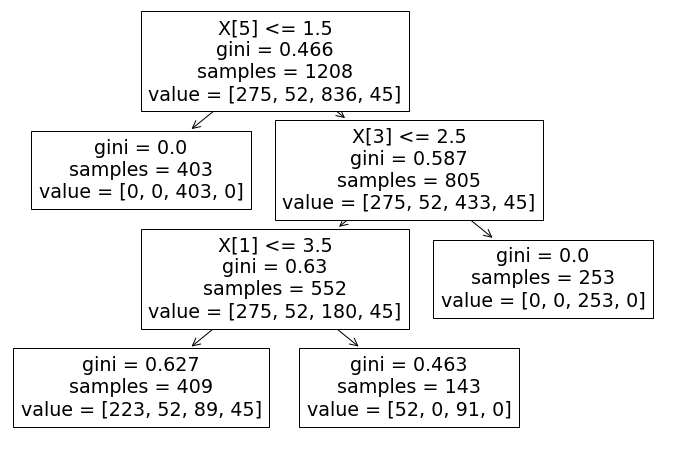

In [45]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train))

## Decision Tree Classifier with criterion entropy

In [47]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

__Predicting our model accuracy__

In [50]:
Y_pred_en = clf_en.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_en)))

Model accuracy score with criterion entropy: 0.8112


In [54]:
Y_pred_train_en = clf_en.predict(X_train)

Y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train_en)))

Training-set accuracy score: 0.8030


In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.8030
Test set score: 0.8112


[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\nentropy = 1.226\nsamples = 1208\nvalue = [275, 52, 836, 45]'),
 Text(133.92000000000002, 271.8, 'entropy = 0.0\nsamples = 403\nvalue = [0, 0, 403, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\nentropy = 1.498\nsamples = 805\nvalue = [275, 52, 433, 45]'),
 Text(267.84000000000003, 163.07999999999998, 'X[1] <= 3.5\nentropy = 1.644\nsamples = 552\nvalue = [275, 52, 180, 45]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 1.685\nsamples = 409\nvalue = [223, 52, 89, 45]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 0.946\nsamples = 143\nvalue = [52, 0, 91, 0]'),
 Text(535.6800000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 253\nvalue = [0, 0, 253, 0]')]

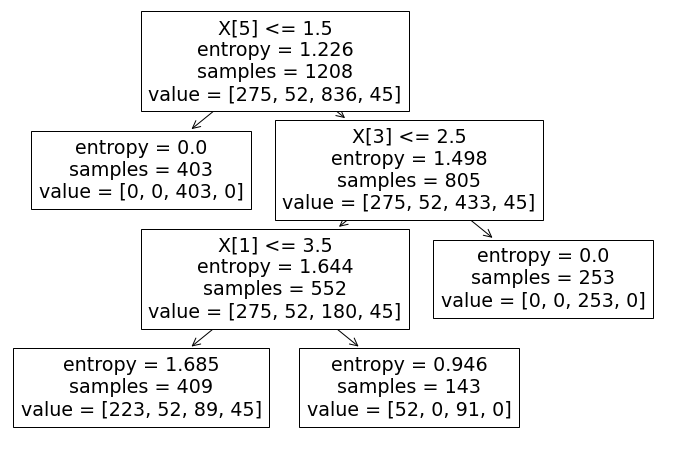

In [57]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train)) 

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 89   0  20   0]
 [ 17   0   0   0]
 [ 41   0 332   0]
 [ 20   0   0   0]]


In [59]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.82      0.64       109
        good       0.00      0.00      0.00        17
       unacc       0.94      0.89      0.92       373
       vgood       0.00      0.00      0.00        20

    accuracy                           0.81       519
   macro avg       0.37      0.43      0.39       519
weighted avg       0.79      0.81      0.79       519

